# Baseline Models

In [ ]:
# packages
import collections
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
import keras.backend as K
from keras.callbacks import Callback
import datetime
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import io
from skimage.transform import resize
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import plot_confusion_matrix
import imgaug.augmenters as im_aug
%matplotlib inline
print("finish loading!")

finish loading!


## Non NN Model w/o Data Aug.

### Random Forest

In [ ]:
path_var = '/content/drive/MyDrive/data/' 
images = np.load(path_var + 'images_origin.npy') # read data
labels = np.load(path_var + 'labels.npy')
image_names = np.load(path_var + 'image_names.npy')

In [ ]:
def print_results(results): # function for print hyperparameter value and model accuracy
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
num_img, xdim, ydim, channel = images.shape
x_nonNN = images.reshape((num_img, xdim * ydim * channel)) # reshape to 2d array

In [ ]:
x_nonNN_train, x_nonNN_valid, y_nonNN_train, y_nonNN_valid = train_test_split(x_nonNN, labels, stratify = labels) # keep the balance of the data (class weight)
print(x_nonNN_train.shape, y_nonNN_train.shape)
print(x_nonNN_valid.shape, y_nonNN_valid.shape)

(447, 196608) (447,)
(150, 196608) (150,)


In [ ]:
rfcl = RandomForestClassifier(criterion="entropy")
parameters = {
    'n_estimators': [300, 500],
    'max_features': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

rf_cv = RandomizedSearchCV(rfcl, parameters, verbose = 3, cv = 5)
rf_cv.fit(x_nonNN_train, y_nonNN_train)

print_results(rf_cv)

y_pred = rf_cv.predict(x_nonNN_valid)
print("The confusion matrix is: ")
print(confusion_matrix(y_nonNN_valid, y_pred))

precision, recall, f1, support = precision_recall_fscore_support(y_nonNN_valid, y_pred, average='macro')
print("precision score: %.2f" % (precision))
print("recall score: %.2f" % (recall))
print("f1 score: %.2f" % (f1))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_leaf=1, max_features=5 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_leaf=1, max_features=5, score=0.578, total=   1.9s
[CV] n_estimators=500, min_samples_leaf=1, max_features=5 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_leaf=1, max_features=5, score=0.522, total=   1.9s
[CV] n_estimators=500, min_samples_leaf=1, max_features=5 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=500, min_samples_leaf=1, max_features=5, score=0.573, total=   1.9s
[CV] n_estimators=500, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=500, min_samples_leaf=1, max_features=5, score=0.573, total=   1.8s
[CV] n_estimators=500, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=500, min_samples_leaf=1, max_features=5, score=0.596, total=   1.8s
[CV] n_estimators=300, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=300, min_samples_leaf=1, max_features=5, score=0.556, total=   1.2s
[CV] n_estimators=300, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=300, min_samples_leaf=1, max_features=5, score=0.533, total=   1.2s
[CV] n_estimators=300, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=300, min_samples_leaf=1, max_features=5, score=0.562, total=   1.2s
[CV] n_estimators=300, min_samples_leaf=1, max_features=5 ............
[CV]  n_estimators=300, min_samples_leaf=1, max_feat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


BEST PARAMS: {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 3}

0.568 (+/-0.049) for {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 5}
0.568 (+/-0.048) for {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 5}
0.55 (+/-0.03) for {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 5}
0.546 (+/-0.064) for {'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 3}
0.58 (+/-0.056) for {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 3}
0.557 (+/-0.046) for {'n_estimators': 500, 'min_samples_leaf': 3, 'max_features': 5}
0.548 (+/-0.042) for {'n_estimators': 500, 'min_samples_leaf': 3, 'max_features': 7}
0.553 (+/-0.044) for {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 7}
0.564 (+/-0.049) for {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 7}
0.541 (+/-0.054) for {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 3}
The confusion matrix is: 
[[ 4 15  1  1]
 [ 1 65  1  7]
 [ 1 13  1  3]
 [ 0

### KNN

In [ ]:
knncl = KNeighborsClassifier(n_neighbors=30, p=2)
# use euclidean distance
# parameters = {
#   'n_neighbors': [30, 35, 40],
#  'weights': ["uniform", "distance"],
#}

#knn_cv = RandomizedSearchCV(knncl, parameters, verbose = 3, cv = 5)
knncl.fit(x_nonNN_train, y_nonNN_train)

#print_results(knncl)

y_pred=knncl.predict(x_nonNN_valid)
print("The confusion matrix is: ")
print(confusion_matrix(y_nonNN_valid,y_pred))

precision,recall,f1,support=precision_recall_fscore_support(y_nonNN_valid,y_pred, average='macro')
accuracy=accuracy_score(y_nonNN_valid, y_pred)
print(accuracy)

The confusion matrix is: 
[[ 1 19  0  1]
 [ 0 71  0  3]
 [ 1 15  0  2]
 [ 0 30  0  7]]
0.5266666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## NN Model Baseline w/o Aug:

### Load data for NN:

In [ ]:
path_var = '/content/drive/MyDrive/project_data/' 
images = np.load(path_var + 'images_origin.npy')
labels = np.load(path_var + 'labels.npy')
image_names = np.load(path_var + 'image_names.npy')


In [ ]:
print(images.shape, labels.shape, len(image_names))

(597, 256, 256, 3) (597,) 597


In [ ]:
print(np.min(images), np.max(images))

0.0 1.0


In [ ]:
labels_cat = keras.utils.to_categorical(labels, 4)


In [ ]:
labels_cat

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
test_label = np.argmax(labels_cat,axis=-1) # change back to original
test_label

array([3, 2, 1, 3, 3, 0, 3, 1, 1, 2, 1, 1, 3, 3, 3, 2, 0, 1, 1, 3, 1, 1,
       0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 2,
       3, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 2, 0, 1, 3, 1, 1, 1, 1, 2, 0, 3,
       3, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 3, 2, 1, 1, 0,
       1, 0, 1, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 3, 1, 1, 0, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1,
       3, 1, 0, 2, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 0, 2, 1, 1, 3, 3,
       3, 3, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 2, 1, 2, 1,
       1, 0, 3, 1, 0, 0, 2, 0, 3, 0, 2, 1, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1,
       0, 1, 1, 1, 3, 1, 0, 3, 0, 3, 1, 1, 0, 2, 0, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 0, 1, 3, 1, 1, 2, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1,
       1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 0, 2, 0, 1, 2, 1, 1, 3, 3, 1, 3, 1,
       2, 3, 3, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 1, 0,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels.astype(int), test_size=0.2, random_state=42, stratify=labels.astype(int))

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(477, 256, 256, 3) (120, 256, 256, 3) (477,) (120,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [ ]:
def to_categorical(target):
  target = keras.utils.to_categorical(y_train, 4)
  return target

In [ ]:
print(y_train.shape, y_test.shape)

(477, 4) (120, 4)


### VGG16:

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model_vgg_pre = Model(base_model.input,x)
for layer in base_model.layers:
  layer.trainable = False

model_vgg_pre.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0000001), loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

model_vgg_pre.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
history_vgg_pre = model_vgg_pre.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=4, verbose=2)

Epoch 1/20
120/120 - 7s - loss: 1.4326 - categorical_accuracy: 0.2495 - val_loss: 1.3771 - val_categorical_accuracy: 0.2500
Epoch 2/20
120/120 - 4s - loss: 1.3384 - categorical_accuracy: 0.2495 - val_loss: 1.3058 - val_categorical_accuracy: 0.2500
Epoch 3/20
120/120 - 4s - loss: 1.2841 - categorical_accuracy: 0.4486 - val_loss: 1.2653 - val_categorical_accuracy: 0.4917
Epoch 4/20
120/120 - 4s - loss: 1.2540 - categorical_accuracy: 0.4927 - val_loss: 1.2445 - val_categorical_accuracy: 0.4917
Epoch 5/20
120/120 - 4s - loss: 1.2387 - categorical_accuracy: 0.4927 - val_loss: 1.2338 - val_categorical_accuracy: 0.4917
Epoch 6/20
120/120 - 4s - loss: 1.2314 - categorical_accuracy: 0.4927 - val_loss: 1.2292 - val_categorical_accuracy: 0.4917
Epoch 7/20
120/120 - 4s - loss: 1.2273 - categorical_accuracy: 0.4927 - val_loss: 1.2264 - val_categorical_accuracy: 0.4917
Epoch 8/20
120/120 - 4s - loss: 1.2253 - categorical_accuracy: 0.4927 - val_loss: 1.2248 - val_categorical_accuracy: 0.4917
Epoch 9/

In [ ]:
model_vgg_pre.evaluate(x_test, y_test)

4/4 [==============================] - 1s 141ms/step - loss: 1.2232 - categorical_accuracy: 0.4917


[1.2231930494308472, 0.49166667461395264]

In [ ]:
def inverse_categorical(target):
  target = np.argmax(pred,axis=-1)
  return target

In [ ]:
pred = model_vgg_pre.predict(x_test)
y_true = np.argmax(y_test, axis = -1)
pred = np.argmax(pred,axis=-1)

Confusion matrix of test data
[[ 0 17  0  0]
 [ 0 59  0  0]
 [ 0 14  0  0]
 [ 0 30  0  0]]


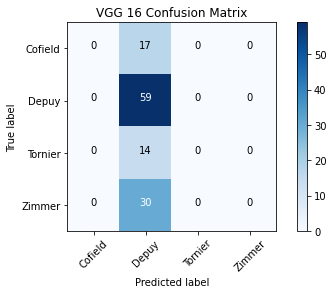

In [ ]:
cm = confusion_matrix(y_true, pred)
import itertools
# note - this confusion matrix code was taken from https://deeplizard.com/learn/video/km7pxKy4UHU
def plot_confusion_matrix(cm, classes, title='VGG 16 Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print("Confusion matrix of test data")
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm,['Cofield','Depuy','Tornier','Zimmer'])

### ResNet50:

In [ ]:
# reference: https://zhuanlan.zhihu.com/p/54289848
base_model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(256, 256, 3), pooling="avg")

output = base_model_resnet.output
for layer in base_model_resnet.layers:
  layer.trainable = False
y = Dense(4, activation='softmax')(output)
model_resnet_pre = Model(base_model_resnet.input,y)

model_resnet_pre.compile(optimizer = keras.optimizers.Adam(learning_rate=0.00001), loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

model_resnet_pre.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
history_resnet_pre = model_resnet_pre.fit(x_train, y_train, validation_split=0.15, epochs=25, batch_size=4, verbose=2)

Epoch 1/25
102/102 - 7s - loss: 2.0840 - categorical_accuracy: 0.1210 - val_loss: 1.9153 - val_categorical_accuracy: 0.1111
Epoch 2/25
102/102 - 2s - loss: 1.8710 - categorical_accuracy: 0.1210 - val_loss: 1.7306 - val_categorical_accuracy: 0.1111
Epoch 3/25
102/102 - 2s - loss: 1.6965 - categorical_accuracy: 0.1210 - val_loss: 1.5831 - val_categorical_accuracy: 0.1111
Epoch 4/25
102/102 - 2s - loss: 1.5524 - categorical_accuracy: 0.1210 - val_loss: 1.4678 - val_categorical_accuracy: 0.1111
Epoch 5/25
102/102 - 2s - loss: 1.4430 - categorical_accuracy: 0.1210 - val_loss: 1.3833 - val_categorical_accuracy: 0.1111
Epoch 6/25
102/102 - 2s - loss: 1.3638 - categorical_accuracy: 0.2568 - val_loss: 1.3255 - val_categorical_accuracy: 0.4583
Epoch 7/25
102/102 - 2s - loss: 1.3095 - categorical_accuracy: 0.4988 - val_loss: 1.2894 - val_categorical_accuracy: 0.4583
Epoch 8/25
102/102 - 2s - loss: 1.2736 - categorical_accuracy: 0.4988 - val_loss: 1.2662 - val_categorical_accuracy: 0.4583
Epoch 9/

In [ ]:
model_resnet_pre.evaluate(x_test, y_test)

4/4 [==============================] - 3s 329ms/step - loss: 1.2236 - categorical_accuracy: 0.4917


[1.2236008644104004, 0.49166667461395264]

In [ ]:
pred = model_resnet_pre.predict(x_test)
y_true = inverse_categorical(y_test)
pred = inverse_categorical(pred)

In [ ]:
cm_res = confusion_matrix(y_true, pred)
print(cm_res)

[[ 0 17  0  0]
 [ 0 59  0  0]
 [ 0 14  0  0]
 [ 0 30  0  0]]


Confusion matrix of test data
[[ 0 17  0  0]
 [ 0 59  0  0]
 [ 0 14  0  0]
 [ 0 30  0  0]]


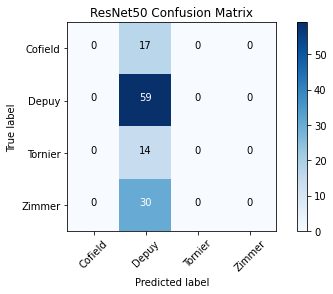

In [ ]:
#cm_res = confusion_matrix(y_true, pred)
import itertools
# note - this confusion matrix code was taken from https://deeplizard.com/learn/video/km7pxKy4UHU
def plot_confusion_matrix(cm, classes, title='ResNet50 Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print("Confusion matrix of test data")
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm_res,['Cofield','Depuy','Tornier','Zimmer'])

In [ ]:
output = base_model_resnet.output
for layer in base_model_resnet.layers:
  layer.trainable = False
y = Dense(4, activation='softmax')(output)
model_resnet_pre2 = Model(base_model_resnet.input,y)

model_resnet_pre2.compile(optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9), loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

model_resnet_pre2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
history_resnet_pre2 = model_resnet_pre2.fit(x_train, y_train, validation_split=0.1, epochs=25, batch_size=4, verbose=2, shuffle=True)

Epoch 1/25
108/108 - 6s - loss: 1.7678 - categorical_accuracy: 0.3660 - val_loss: 1.6952 - val_categorical_accuracy: 0.4583
Epoch 2/25
108/108 - 2s - loss: 1.7886 - categorical_accuracy: 0.3730 - val_loss: 2.3216 - val_categorical_accuracy: 0.4583
Epoch 3/25
108/108 - 2s - loss: 1.9932 - categorical_accuracy: 0.3893 - val_loss: 2.1888 - val_categorical_accuracy: 0.4583
Epoch 4/25
108/108 - 2s - loss: 1.7921 - categorical_accuracy: 0.3800 - val_loss: 1.7287 - val_categorical_accuracy: 0.4583
Epoch 5/25
108/108 - 2s - loss: 1.7991 - categorical_accuracy: 0.3497 - val_loss: 2.6622 - val_categorical_accuracy: 0.4583
Epoch 6/25
108/108 - 2s - loss: 1.9448 - categorical_accuracy: 0.3800 - val_loss: 1.9296 - val_categorical_accuracy: 0.1042
Epoch 7/25
108/108 - 2s - loss: 1.8201 - categorical_accuracy: 0.3497 - val_loss: 1.6181 - val_categorical_accuracy: 0.3125
Epoch 8/25
108/108 - 2s - loss: 1.8105 - categorical_accuracy: 0.3753 - val_loss: 1.9200 - val_categorical_accuracy: 0.4583
Epoch 9/

In [ ]:
model_resnet_pre.evaluate(x_test, y_test)

4/4 [==============================] - 0s 107ms/step - loss: 1.2236 - categorical_accuracy: 0.4917


[1.2236008644104004, 0.49166667461395264]

### VGG from scratch

In [ ]:
base_model_scratch = VGG16(weights=None, include_top=False, input_shape=(256, 256, 3))
x = base_model_scratch.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
#x = Dense(4096, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

model_vgg_scratch = Model(base_model_scratch.input,prediction)
# for layer in base_model.layers:
#   layer.trainable = False

model_vgg_scratch.compile(optimizer = keras.optimizers.Adam(0.00003), loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

model_vgg_scratch.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
history_vgg_scratch = model_vgg_scratch.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=2) # tried batch_size of 16, 8, 4

Epoch 1/50
14/14 - 72s - loss: 1.3248 - categorical_accuracy: 0.4662 - val_loss: 1.2333 - val_categorical_accuracy: 0.4583
Epoch 2/50
14/14 - 13s - loss: 1.2574 - categorical_accuracy: 0.4965 - val_loss: 1.2192 - val_categorical_accuracy: 0.4583
Epoch 3/50
14/14 - 13s - loss: 1.2471 - categorical_accuracy: 0.4965 - val_loss: 1.2234 - val_categorical_accuracy: 0.4583
Epoch 4/50
14/14 - 13s - loss: 1.2420 - categorical_accuracy: 0.4965 - val_loss: 1.2501 - val_categorical_accuracy: 0.4583
Epoch 5/50
14/14 - 13s - loss: 1.2658 - categorical_accuracy: 0.4965 - val_loss: 1.2388 - val_categorical_accuracy: 0.4583
Epoch 6/50
14/14 - 13s - loss: 1.2448 - categorical_accuracy: 0.4965 - val_loss: 1.2463 - val_categorical_accuracy: 0.4583
Epoch 7/50
14/14 - 13s - loss: 1.2445 - categorical_accuracy: 0.4988 - val_loss: 1.2271 - val_categorical_accuracy: 0.4583
Epoch 8/50
14/14 - 13s - loss: 1.2238 - categorical_accuracy: 0.4988 - val_loss: 1.2055 - val_categorical_accuracy: 0.4583
Epoch 9/50
14/14

In [ ]:
model_vgg_scratch.evaluate(x_test, y_test)

4/4 [==============================] - 10s 3s/step - loss: 5.4445 - categorical_accuracy: 0.4500


[5.4445366859436035, 0.44999998807907104]

In [ ]:
pred = model_vgg_scratch.predict(x_test)
pred = np.argmax(pred,axis=-1)
true_labels = np.argmax(y_test,axis=-1)
test_results = list(precision_recall_fscore_support(true_labels, pred, average = 'macro')[:-1])
test_results

[0.3787426653805964, 0.3715555713810948, 0.3748103748103748]

### Inception

In [ ]:
path_var = '/content/drive/MyDrive/project_data/' 
images = np.load(path_var + 'images_origin.npy')
labels = np.load(path_var + 'labels.npy')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels.astype(int), test_size=0.2, random_state=42, stratify=labels.astype(int))
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [ ]:
def add_new_last_layer(base_model, nb_classes):
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x) #new FC layer, random init
  predictions = Dense(nb_classes, activation='softmax')(x) #new softmax layer
  model = Model(base_model.input, predictions)
  return model

In [ ]:
def setup_to_transfer_learn(model, base_model):
  """Freeze all layers and compile the model"""
  for layer in base_model.layers:
    layer.trainable = False
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False) 
model = add_new_last_layer(base_model, 4)              
setup_to_transfer_learn(model, base_model)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
history_inception = model.fit(x_train, y_train, epochs=25, batch_size=4, validation_split=0.1)

Epoch 1/25
108/108 [==============================] - 14s 76ms/step - loss: 1.8103 - accuracy: 0.4576 - val_loss: 1.0609 - val_accuracy: 0.5417
Epoch 2/25
108/108 [==============================] - 6s 57ms/step - loss: 0.9532 - accuracy: 0.6311 - val_loss: 0.9377 - val_accuracy: 0.5417
Epoch 3/25
108/108 [==============================] - 6s 56ms/step - loss: 0.7117 - accuracy: 0.7123 - val_loss: 1.0878 - val_accuracy: 0.5417
Epoch 4/25
108/108 [==============================] - 6s 57ms/step - loss: 0.5943 - accuracy: 0.7896 - val_loss: 0.9798 - val_accuracy: 0.6042
Epoch 5/25
108/108 [==============================] - 6s 57ms/step - loss: 0.5564 - accuracy: 0.8102 - val_loss: 1.2816 - val_accuracy: 0.5417
Epoch 6/25
108/108 [==============================] - 6s 56ms/step - loss: 0.4781 - accuracy: 0.8049 - val_loss: 1.0453 - val_accuracy: 0.6042
Epoch 7/25
108/108 [==============================] - 6s 57ms/step - loss: 0.3021 - accuracy: 0.9045 - val_loss: 1.6277 - val_accuracy: 0.562

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 6s 782ms/step - loss: 1.5983 - accuracy: 0.6583


[1.5982508659362793, 0.6583333611488342]

In [ ]:
pred_in = model.predict(x_test)
pred_in = np.argmax(pred_in,axis=-1)
true_labels = np.argmax(y_test,axis=-1)
test_results = list(precision_recall_fscore_support(true_labels, pred_in, average = 'macro')[:-1])
test_results

[0.6071694006476616, 0.6134394435740398, 0.6065628035445868]

In [ ]:
def setup_to_finetune(model):
  for layer in model.layers[:NB_IV3_LAYERS_TO_FREEZE]:
     layer.trainable = False
  for layer in model.layers[NB_IV3_LAYERS_TO_FREEZE:]:
     layer.trainable = True
  model.compile(keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
NB_IV3_LAYERS_TO_FREEZE = 172
#base_model = InceptionV3(weights='imagenet', include_top=False)
model_ince2 = add_new_last_layer(base_model, 4)             
setup_to_finetune(model_ince2)

In [ ]:
history_inception2 = model_ince2.fit(x_train, y_train, epochs=25, batch_size=4, validation_split=0.1)

Epoch 1/25
108/108 [==============================] - 11s 54ms/step - loss: 1.3373 - accuracy: 0.3829 - val_loss: 1.2531 - val_accuracy: 0.4167
Epoch 2/25
108/108 [==============================] - 4s 39ms/step - loss: 1.1602 - accuracy: 0.4693 - val_loss: 1.2477 - val_accuracy: 0.4375
Epoch 3/25
108/108 [==============================] - 4s 39ms/step - loss: 1.0361 - accuracy: 0.5895 - val_loss: 1.2152 - val_accuracy: 0.4375
Epoch 4/25
108/108 [==============================] - 4s 39ms/step - loss: 0.9109 - accuracy: 0.6075 - val_loss: 1.1403 - val_accuracy: 0.4167
Epoch 5/25
108/108 [==============================] - 4s 39ms/step - loss: 0.8299 - accuracy: 0.6838 - val_loss: 1.1221 - val_accuracy: 0.4375
Epoch 6/25
108/108 [==============================] - 4s 39ms/step - loss: 0.7555 - accuracy: 0.7335 - val_loss: 1.0815 - val_accuracy: 0.4167
Epoch 7/25
108/108 [==============================] - 4s 39ms/step - loss: 0.6756 - accuracy: 0.8060 - val_loss: 1.0516 - val_accuracy: 0.520